In [ ]:
!pip install langchain langgraph langsmith IPython "langchain[ollama]"

4097.73s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [28]:
# create a StateGraph

from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # Messages have the type `list`. The add_messages function in the annotation defines how this state key should be updated
    # In this case, It appends messages to the lust, rather than overwriting them
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(AgentState)


In [29]:
# create a node `chatbot` 
import os

from langchain.chat_models import init_chat_model

llm = init_chat_model("ollama:llama3.2")


# the chatbot node
def chatbot(state: AgentState):
    # making a llm call
    response = llm.invoke(state['messages'])

    # returning the updated state
    return {"messages": [response]}


graph_builder.add_node("chatbot", chatbot)
# add the graph entry point
graph_builder.set_entry_point('chatbot')

# compiling the graph
graph = graph_builder.compile()


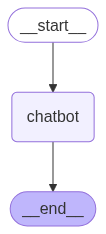

In [30]:
# visualize the graph
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print("Exception occurred while displaying the graph")

In [31]:
# Run the chatbot

# method to invoke the graph
def stream_graph_updates(user_input: str):

    initial_state = {"messages": [{"role": "user", "content": user_input}]}
    print("\nUser: ", user_input,'\n\n')
    for event in graph.stream(initial_state):
        for value in event.values():
            print("\nAssistent: ", value['messages'][-1].content,'\n\n')


while True:
    try:
        user_input = input("User: ").strip()
        if user_input.lower() in ["quit", "q", "exit"]:
            print("Goodbye...!")
            break

        stream_graph_updates(user_input=user_input)
    except Exception as e:
        # fallback if input() is not available

        user_input = "What do you know about LangGraph?"
        print("User: ", user_input)
        stream_graph_updates(user_input=user_input)
        break


User:  what are the specifications of Triumph Street Triple R motorcycle? 



Assistent:  The Triumph Street Triple R is a high-performance version of the popular Street Triple motorcycle. Here are its specifications:

**Engine**

* Type: 1137cc, liquid-cooled, DOHC inline-3 cylinder
* Power: 180 horsepower (134 kW) at 14,500 rpm
* Torque: 83 lb-ft (112 Nm) at 10,000 rpm

**Transmission**

* Type: 6-speed constant mesh gearbox with a wet clutch
* Gear ratios: 1.63:1, 2.24:1, 3.00:1, 3.56:1, 4.50:1, 5.08:1

**Brakes**

* Front brake: 320mm Brembo monoblock discs with 6-piston calipers
* Rear brake: 240mm Brembo single disc with 2-piston caliper

**Suspension**

* Front suspension: Öhlins Road & Track forks with 41mm stanchions, 45mm piston, and 35mm fork tube
* Rear suspension: Öhlins TTX 36 shock absorber with a spring preload adjuster and 150mm stroke

**Wheels and Tyres**

* Front wheel: 17 x 3.5-inch aluminum alloy rim with Pirelli Angel ST III tires
* Rear wheel: 17 x 4.25-inch al

Add Tools

To handle the queries that your chatbot can't answer from memory, integrate a web search tool. The chatbot can use this tool to find relevant information and provide better responses.


In [38]:
# Install the search engine
!pip install langchain-tavily dotenv

5008.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [dotenv]


In [39]:
#  configure the environment
from dotenv import load_dotenv
load_dotenv()


True

In [40]:
# define the tool
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results = 2)
tools = [tool]
tool.invoke("What is a node in langgraph?")

{'query': 'What is a node in langgraph?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What is LangGraph? - IBM',
   'url': 'https://www.ibm.com/think/topics/langgraph',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by